This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Example for georeferencing a radar dataset

In [1]:
import wradlib as wrl
import xarray as xr
import xradar as xd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

**1st step:** Compute centroid coordinates and vertices of all radar bins in WGS84 (longitude and latitude).

In [2]:
swp = (
    xd.model.create_sweep_dataset(rng=1000)
    .swap_dims(time="azimuth")
    .isel(range=slice(0, 100))
)
swp = swp.assign_coords(sweep_mode="azimuthal_surveillance")
swp = swp.wrl.georef.georeference()
swp

<xarray.Dataset>
Dimensions:      (azimuth: 360, range: 100)
Coordinates: (12/15)
    time         (azimuth) datetime64[ns] 2022-08-27T10:00:00 ... 2022-08-27T...
  * range        (range) float64 500.0 1.5e+03 2.5e+03 ... 9.85e+04 9.95e+04
  * azimuth      (azimuth) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation    (azimuth) float64 ...
    longitude    float64 ...
    latitude     float64 ...
    ...           ...
    y            (azimuth, range) float64 499.9 1.5e+03 ... 9.845e+04 9.945e+04
    z            (azimuth, range) float64 383.7 401.3 ... 2.665e+03 2.694e+03
    gr           (azimuth, range) float64 499.9 1.5e+03 ... 9.846e+04 9.946e+04
    rays         (azimuth, range) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    bins         (azimuth, range) float64 500.0 1.5e+03 ... 9.85e+04 9.95e+04
    spatial_ref  int64 0
Data variables:
    *empty*

We can now generate the polgon vertices of the radar bins - with **each vertex in lon/lat coordinates**.

In [3]:
proj_wgs84 = wrl.georef.epsg_to_osr(4326)
polygons = swp.wrl.georef.spherical_to_polyvert(crs=proj_wgs84, keep_attrs=True)
polygons

<xarray.DataArray 'spherical_to_polyvert' (bins: 36000, vert: 5, xy: 3)>
array([[[   8.787727  ,   46.172541  ,  374.80773951],
        [   8.787727  ,   46.18153568,  392.26012953],
        [   8.78795299,   46.18153431,  392.26012953],
        [   8.787727  ,   46.172541  ,  374.80773951],
        [   8.787727  ,   46.172541  ,  374.80773951]],

       [[   8.787727  ,   46.18153568,  392.26012953],
        [   8.787727  ,   46.19053031,  409.71248369],
        [   8.78817906,   46.19052757,  409.71248369],
        [   8.78795299,   46.18153431,  392.26012953],
        [   8.787727  ,   46.18153568,  392.26012953]],

       [[   8.787727  ,   46.19053031,  409.71248369],
        [   8.787727  ,   46.19952488,  427.65883849],
        [   8.7884052 ,   46.19952077,  427.65883849],
        [   8.78817906,   46.19052757,  409.71248369],
        [   8.787727  ,   46.19053031,  409.71248369]],

       ...,

       [[   8.76546085,   47.04461365, 2621.70872641],
        [   8.76522761,   47.05360078, 2650.51645594],
        [   8.78772694,   47.05373715, 2650.51645594],
        [   8.78772694,   47.04474861, 2621.70872641],
        [   8.76546085,   47.04461365, 2621.70872641]],

       [[   8.76522761,   47.05360078, 2650.51645594],
        [   8.76499429,   47.06258785, 2679.32395306],
        [   8.78772694,   47.06272564, 2679.32395306],
        [   8.78772694,   47.05373715, 2650.51645594],
        [   8.76522761,   47.05360078, 2650.51645594]],

       [[   8.76499429,   47.06258785, 2679.32395306],
        [   8.76476089,   47.0715748 , 2708.62539308],
        [   8.78772694,   47.071714  , 2708.62539308],
        [   8.78772694,   47.06272564, 2679.32395306],
        [   8.76499429,   47.06258785, 2679.32395306]]])
Coordinates:
    longitude    float64 8.788
    latitude     float64 46.17
    altitude     int64 375
    sweep_mode   <U22 'azimuthal_surveillance'
    spatial_ref  int64 0
Dimensions without coordinates: bins, vert, xy

... or we can compute the corresponding centroids of all bins -  - with **each centroid in lon/lat coordinates**.

In [4]:
centroids = swp.wrl.georef.spherical_to_centroids(crs=proj_wgs84, keep_attrs=True)
centroids

<xarray.DataArray 'spherical_to_centroids' (azimuth: 360, range: 100, xyz: 3)>
array([[[   8.7877835 ,   46.17703817,  383.533939  ],
        [   8.78789652,   46.18603248,  400.98631004],
        [   8.78800957,   46.19502674,  418.9326875 ],
        ...,
        [   8.79891893,   47.04920899, 2635.86564832],
        [   8.79903558,   47.05819709, 2665.16723829],
        [   8.79915226,   47.06718519, 2693.97468571]],

       [[   8.78789647,   46.1770368 ,  383.533939  ],
        [   8.7882355 ,   46.18602837,  400.98631004],
        [   8.78857463,   46.19501989,  418.9326875 ],
        ...,
        [   8.82129918,   47.04893765, 2635.86564832],
        [   8.82164908,   47.05792293, 2665.16723829],
        [   8.82199909,   47.06690819, 2693.97468571]],

       [[   8.7880094 ,   46.17703406,  383.533939  ],
        [   8.78857432,   46.18602015,  400.98631004],
        [   8.78913943,   46.19500619,  418.9326875 ],
        ...,
...
        ...,
        [   8.73178511,   47.04839503, 2635.86564832],
        [   8.73120208,   47.05737466, 2665.16723829],
        [   8.73061885,   47.06635427, 2693.97468571]],

       [[   8.78755753,   46.1770368 ,  383.533939  ],
        [   8.78721851,   46.18602837,  400.98631004],
        [   8.78687937,   46.19501989,  418.9326875 ],
        ...,
        [   8.75415509,   47.04893765, 2635.86564832],
        [   8.75380519,   47.05792293, 2665.16723829],
        [   8.75345518,   47.0669082 , 2693.97468571]],

       [[   8.7876705 ,   46.17703817,  383.533939  ],
        [   8.78755749,   46.18603248,  400.98631004],
        [   8.78744443,   46.19502674,  418.9326875 ],
        ...,
        [   8.77653518,   47.04920899, 2635.86564832],
        [   8.77641854,   47.05819709, 2665.16723829],
        [   8.77630185,   47.06718519, 2693.97468571]]])
Coordinates:
  * range        (range) float64 500.0 1.5e+03 2.5e+03 ... 9.85e+04 9.95e+04
    longitude    float64 8.788
    latitude     float64 46.17
    altitude     int64 375
    sweep_mode   <U22 'azimuthal_surveillance'
    spatial_ref  int64 0
    time         (azimuth) datetime64[ns] 2022-08-27T10:00:00 ... 2022-08-27T...
  * azimuth      (azimuth) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation    (azimuth) float64 ...
Dimensions without coordinates: xyz

In order to understand how vertices and centroids correspond, we can plot them together.

(46.422541, 46.56147892646742)

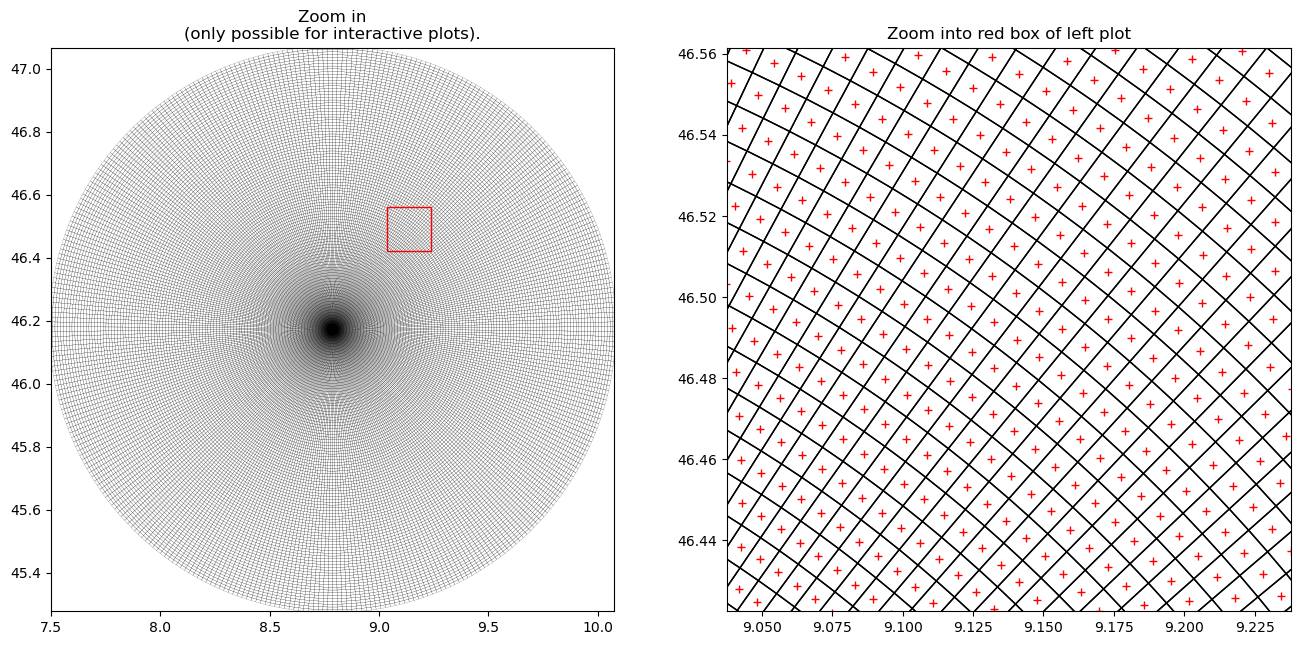

In [5]:
fig = plt.figure(figsize=(16, 16))
site = (polygons.longitude.values, polygons.latitude.values)

aspect = (centroids[..., 0].max() - centroids[..., 0].min()) / (
    centroids[..., 1].max() - centroids[..., 1].min()
)
ax = fig.add_subplot(121, aspect=aspect)
polycoll = mpl.collections.PolyCollection(
    polygons.isel(xy=slice(0, 2)), closed=True, facecolors="None", linewidth=0.1
)
ax.add_collection(polycoll, autolim=True)
# ax.plot(centroids[..., 0], centroids[..., 1], 'r+')
plt.title("Zoom in\n(only possible for interactive plots).")
ax.add_patch(
    Rectangle(
        (site[0] + 0.25, site[1] + 0.25),
        0.2,
        0.2 / aspect,
        edgecolor="red",
        facecolor="None",
        zorder=3,
    )
)
plt.xlim(centroids[..., 0].min(), centroids[..., 0].max())
plt.ylim(centroids[..., 1].min(), centroids[..., 1].max())

ax = fig.add_subplot(122, aspect=aspect)
polycoll = mpl.collections.PolyCollection(
    polygons.isel(xy=slice(0, 2)), closed=True, facecolors="None"
)
ax.add_collection(polycoll, autolim=True)
ax.plot(centroids[..., 0], centroids[..., 1], "r+")
plt.title("Zoom into red box of left plot")
plt.xlim(site[0] + 0.25, site[0] + 0.25 + 0.2)
plt.ylim(site[1] + 0.25, site[1] + 0.25 + 0.2 / aspect)

**2nd step:** Reproject the centroid coordinates to Gauss-Krueger Zone 3 (i.e. EPSG-Code 31467).

In [6]:
centroids_xyz = centroids.assign_coords(xyz=["x", "y", "z"]).to_dataset("xyz")
centroids_xyz

<xarray.Dataset>
Dimensions:      (azimuth: 360, range: 100)
Coordinates:
  * range        (range) float64 500.0 1.5e+03 2.5e+03 ... 9.85e+04 9.95e+04
    longitude    float64 8.788
    latitude     float64 46.17
    altitude     int64 375
    sweep_mode   <U22 'azimuthal_surveillance'
    spatial_ref  int64 0
    time         (azimuth) datetime64[ns] 2022-08-27T10:00:00 ... 2022-08-27T...
  * azimuth      (azimuth) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation    (azimuth) float64 ...
Data variables:
    x            (azimuth, range) float64 8.788 8.788 8.788 ... 8.776 8.776
    y            (azimuth, range) float64 46.18 46.19 46.2 ... 47.05 47.06 47.07
    z            (azimuth, range) float64 383.5 401.0 ... 2.665e+03 2.694e+03

In [7]:
proj_gk3 = wrl.georef.epsg_to_osr(31467)
centroids_xyz = centroids_xyz.wrl.georef.reproject(trg_crs=proj_gk3)
centroids_xyz

<xarray.Dataset>
Dimensions:      (azimuth: 360, range: 100)
Coordinates:
    x            (azimuth, range) float64 3.484e+06 3.484e+06 ... 3.484e+06
    y            (azimuth, range) float64 5.115e+06 5.115e+06 ... 5.115e+06
    z            (azimuth, range) float64 383.5 401.0 ... 2.665e+03 2.694e+03
  * range        (range) float64 500.0 1.5e+03 2.5e+03 ... 9.85e+04 9.95e+04
    longitude    float64 8.788
    latitude     float64 46.17
    altitude     int64 375
    sweep_mode   <U22 'azimuthal_surveillance'
    spatial_ref  int64 0
    time         (azimuth) datetime64[ns] 2022-08-27T10:00:00 ... 2022-08-27T...
  * azimuth      (azimuth) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation    (azimuth) float64 ...
Data variables:
    *empty*